# Import libraries

In [1]:
import time
import os
import sys
sys.path.insert(1, 'src/') #point to the required folder
from Asset_degradation import *
from sensitivity_analysis import *

# Global variables

In [2]:
short_term = Failure_mode_degradation(initial_condition = 10, failure_threshold = 100, average_degradation_parameter = 2, variability_degradation_parameter = 4,
                                      degradation = [], inspection = 15, time_maintenance_threshold = 100, condition_maintenance_threshold = 100, inspection_costs = 0, sensor_costs = 0,
                                      preventive_maintenance_costs= 500, corrective_maintenance_costs = 1500, uncertainty_bias = 0, uncertainty_level = 0.2) #short-term failure mode definition
long_term = Failure_mode_degradation(initial_condition = 0, failure_threshold = 200, average_degradation_parameter = 0.5, variability_degradation_parameter = 2,
                                     degradation = [], inspection = 15, time_maintenance_threshold = 200, condition_maintenance_threshold = 200, inspection_costs = 100, sensor_costs = 1000,
                                     preventive_maintenance_costs= 5000, corrective_maintenance_costs = 10000, uncertainty_bias = 0, uncertainty_level = 0.2) #long-term failure mode definition
shock_threshold = 50 #threshold of activation for the shocks
lameda_shocks = 0.5 #shocks per time step
shock_intensity_mean = 3 #normal distribution
shock_intensity_stdev = 4 #normal distribution
simulating_periods = 1000

# Test developed functions

## Simulate degradation (example)

In [3]:
start_time = time.time()
short_term, long_term = simulate_degradation(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods)
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

--- Simulation computational time = 0.039591073989868164 seconds ---


## Get maintenance interventions (example)

In [4]:
st_teste = maintenance_interventions(short_term.degradation, short_term.initial_condition, short_term.failure_threshold)
lt_teste = maintenance_interventions(long_term.degradation, long_term.initial_condition, long_term.failure_threshold)

# Get MTBF of each failure mode (example)

In [5]:
print(f"The mtbf for the short-term={short_term.compute_mtbf('wienner')}")
print(f"The mtbf for the long-term={long_term.compute_mtbf('gamma')}")

The mtbf for the short-term=45.0
The mtbf for the long-term=200.25


## Plot of the simulated degradation (example)

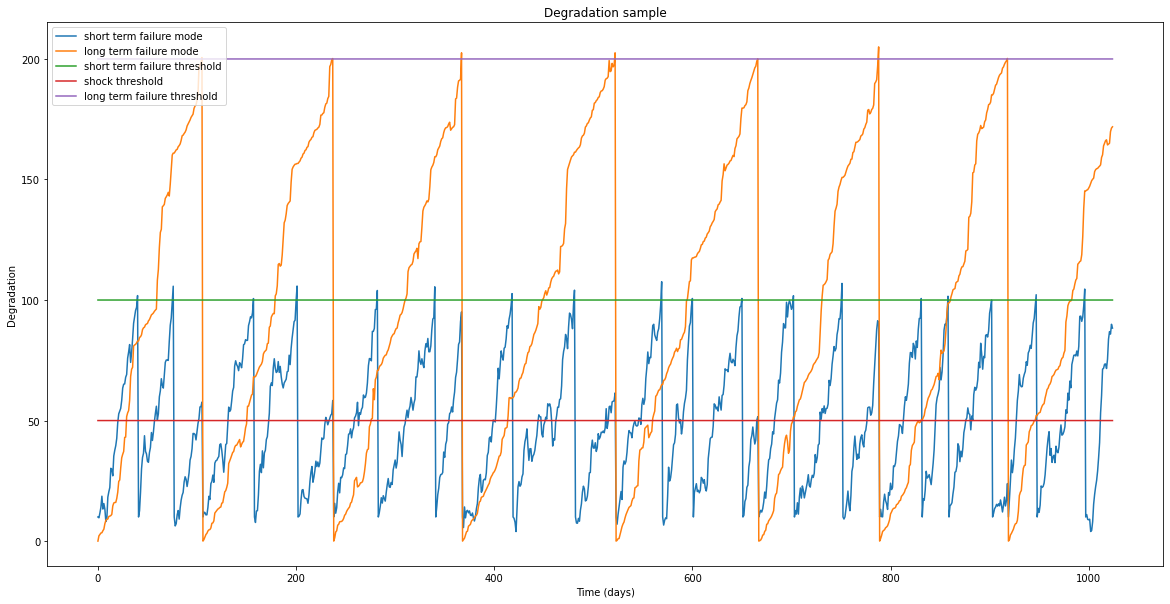

In [6]:
degradation_plot(short_term.degradation, short_term.failure_threshold, shock_threshold, long_term.degradation, long_term.failure_threshold)

# Test maintenance policies optimization - example for the Corrective Maintenance (CM)

In [18]:
#Start clock
start_time = time.time()

#Define maintenance policy
maintenance_policy = 'CM'
policy_step = 0.1
time_limit = 200
simulating_periods = 10000

#Compute maintenance policy
_, cost, _ = optimal_maintenance_policy_cost(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, time_limit, policy_step)

#Output optimal costs
print(f'Expected maintenance cost per unit of time using a corrective maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

Expected maintenance cost per unit of time using a corrective maintenance policy = 25.83
--- Simulation computational time = 0.9290659427642822 seconds ---


# Test best maintenance policies optimization - example for the best cost (replace immediately before failure)

In [13]:
#Start clock
start_time = time.time()

#Define maintenance policy
maintenance_policy = 'PM'
policy_step = 0.1
time_limit = 200
simulating_periods = 10000

#Compute maintenance policy
_, cost, _ = optimal_maintenance_policy_cost(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, time_limit, policy_step)

#Output optimal costs
print(f'Expected maintenance cost per unit of time using a perfect maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

Expected maintenance cost per unit of time using a perfect maintenance policy = 13.8
--- Simulation computational time = 0.5075681209564209 seconds ---


# Test maintenance policies optimization - example for the Time Based Maintenance (TBM)
# assuming failure independence

In [21]:
#Start clock
start_time = time.time()

#Define maintenance policy
maintenance_policy = 'ITBM'
policy_step = 0.1
time_limit = 200
simulating_periods = 10000

#Compute maintenance policy
optimal_decision, cost, results = optimal_maintenance_policy_cost(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, time_limit, policy_step)

#Optimal decisions
lt_optimal_t = results[results['lt_expected_maintenance_cost_per_unit_of_time']==np.min(results['lt_expected_maintenance_cost_per_unit_of_time'])].index[0]*policy_step
st_optimal_t = results[results['st_expected_maintenance_cost_per_unit_of_time']==np.min(results['st_expected_maintenance_cost_per_unit_of_time'])].index[0]*policy_step
print(f'The long-term optimal replacement period is {lt_optimal_t} || The short-term optimal replacement period is {st_optimal_t}')

#Output optimal costs
print(f'Expected maintenance cost per unit of time using a time based maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

The long-term optimal replacement period is 159.0 || The short-term optimal replacement period is 23.0
Expected maintenance cost per unit of time using a time based maintenance policy = 6.04
--- Simulation computational time = 2.474975109100342 seconds ---


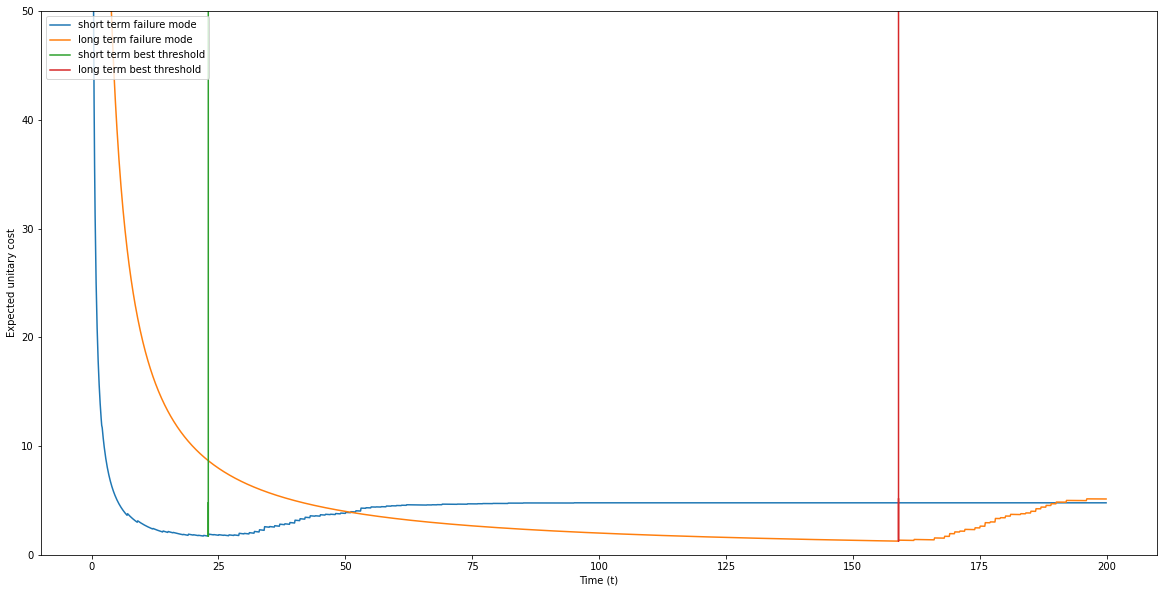

In [22]:
policy_costs_plot(list(results['st_expected_maintenance_cost_per_unit_of_time']), list(results['lt_expected_maintenance_cost_per_unit_of_time']), time_limit, policy_step, "Time (t)", 50)

# Test maintenance policies optimization - example for the Time Based Maintenance (TBM)

In [3]:
#Start clock
start_time = time.time()

#Define maintenance policy
maintenance_policy = 'TBM'
policy_step = 5
condition_limit = 200
simulating_periods = 10000

#Compute maintenance policy
optimal_decision, cost, results = optimal_maintenance_policy_cost(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, condition_limit, policy_step)

#Output optimal decision
print(f'The long-term optimal time threshold is {optimal_decision.split("/")[0]} || The short-term optimal time threshold is {optimal_decision.split("/")[1]}')

#Output optimal costs
print(f'Expected maintenance cost per unit of time using a continuous time based maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

The long-term optimal time threshold is 161 || The short-term optimal time threshold is 21
Expected maintenance cost per unit of time using a continuous time based maintenance policy = 2.36
--- Simulation computational time = 61.759864807128906 seconds ---


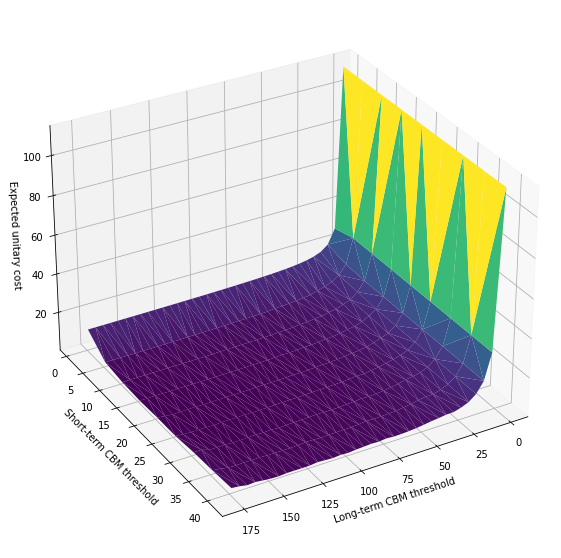

In [24]:
#alterar texto das legendas. tenho de atualizar a função
plot_cbm_maintenance_costs(results, 60)

# Test maintenance policies optimization - example for the Continuous Based Maintenance with perfect continuous inspection (CBM)

In [3]:
#Start clock
start_time = time.time()

#Define maintenance policy
maintenance_policy = 'CBM'
policy_step = 10
condition_limit = 200
simulating_periods = 10000

#Compute maintenance policy
optimal_decision, cost, optimal_lifetimes, results = optimal_maintenance_policy_cost(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, condition_limit, policy_step)

#Output optimal decision
print(f'The long-term optimal condition threshold is {optimal_decision.split("/")[0]} || The short-term optimal condition threshold is {optimal_decision.split("/")[1]}')

#Output optimal lifetime
print(f'The long-term optimal lifetime is {optimal_lifetimes.split("/")[0]} || The short-term optimal lifetime is {optimal_lifetimes.split("/")[1]}')

#Output optimal costs
print(f'Expected maintenance cost per unit of time using a continuous condition based maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

The long-term optimal condition threshold is 191 || The short-term optimal condition threshold is 51
Expected maintenance cost per unit of time using a continuous condition based maintenance policy = 54.93
--- Simulation computational time = 59.90457010269165 seconds ---


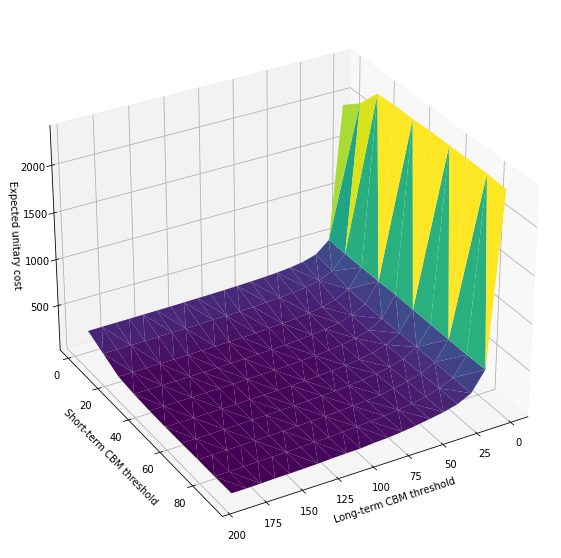

In [4]:
plot_cbm_maintenance_costs(results, 60)

# Test maintenance policies optimization - example for the Continuous Based Maintenance with imperfect continuous inspection (ECBM)

In [5]:
#Start clock
start_time = time.time()

#Define maintenance policy
maintenance_policy = 'ECBM'
policy_step = 10
condition_limit = 200
simulating_periods = 10000

#Compute maintenance policy
optimal_decision, cost, optimal_lifetimes, results = optimal_maintenance_policy_cost(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, condition_limit, policy_step)

#Output optimal decision
print(f'The long-term optimal condition threshold is {optimal_decision.split("/")[0]} || The short-term optimal condition threshold is {optimal_decision.split("/")[1]}')

#Output optimal lifetime
print(f'The long-term optimal lifetime is {optimal_lifetimes.split("/")[0]} || The short-term optimal lifetime is {optimal_lifetimes.split("/")[1]}')

#Output optimal costs
print(f'Expected maintenance cost per unit of time using a continuous condition based maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

The long-term optimal condition threshold is 191 || The short-term optimal condition threshold is 51
The long-term optimal lifetime is 19.382084095063984 || The short-term optimal lifetime is 151.42857142857142
Expected maintenance cost per unit of time using a continuous condition based maintenance policy = 64.91
--- Simulation computational time = 74.28290605545044 seconds ---


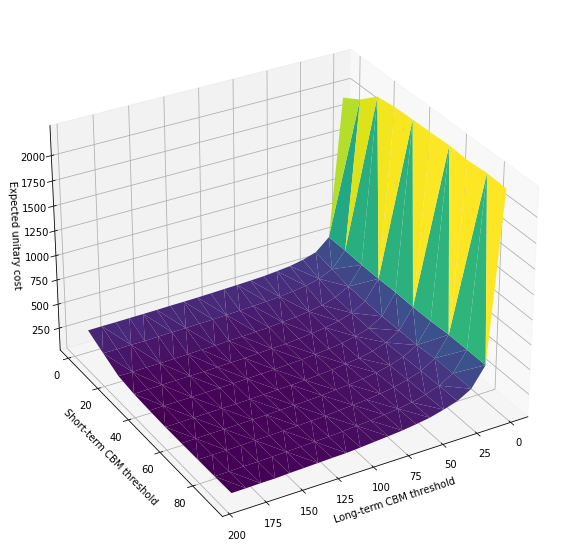

In [6]:
plot_cbm_maintenance_costs(results, 60)

# Test maintenance policies optimization - example for the optimized Continuous Based Maintenance with perfect inspection (ICBM)

In [ ]:
#Define maintenance policy
optimal_cost, inspection_time_list = list(), list()
maintenance_policy = 'ICBM'
policy_step = 5
condition_limit = 200
simulating_periods = 10000

for inspection_time in range(10,101,5):

    #Start clock
    start_time = time.time()

    #Define inspection time
    short_term.inspection, long_term.inspection = inspection_time,inspection_time

    #Compute maintenance policy
    optimal_decision, cost, results = optimal_maintenance_policy_cost(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, condition_limit, policy_step)

    #Output optimal decisions
    print(f'The long-term optimal condition threshold is {optimal_decision.split("/")[0]} || The short-term optimal condition threshold is {optimal_decision.split("/")[1]} with an inspection period of {short_term.inspection}')

    #Output optimal costs
    print(f'Expected maintenance cost per unit of time using a inspection condition based maintenance policy = {cost}')

    #Save the obtained result given the inspection
    optimal_cost.append(cost), inspection_time_list.append(inspection_time)

    #print computational time
    print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

In [ ]:
#build inspection policy
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(np.array(inspection_time_list), np.array(optimal_cost))

#Plot labeling
ax.set(xlabel="Inspection time (t)", ylabel='Expected unitary cost')

#add thresholds
ax.plot([inspection_time_list[optimal_cost.index(min(optimal_cost))]] * len(inspection_time_list), np.array(optimal_cost), label="Best inspection time")

#Plot ylim
plt.ylim(0,max(optimal_cost))

#Show results
plt.legend(loc='upper left')
plt.show()

# Test maintenance policies optimization - example for the Continuous Based Maintenance with perfect inspection (ICBM)

In [ ]:
#Start clock
start_time = time.time()

#Define maintenance policy
short_term.inspection, long_term.inspection = inspection_time_list[optimal_cost.index(min(optimal_cost))], inspection_time_list[optimal_cost.index(min(optimal_cost))]
maintenance_policy = 'ICBM'
policy_step = 5
condition_limit = 200
simulating_periods = 10000

#Compute maintenance policy
optimal_decision, cost, results = optimal_maintenance_policy_cost(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, condition_limit, policy_step)

#Output optimal decisions
print(f'The long-term optimal condition threshold is {optimal_decision.split("/")[0]} || The short-term optimal condition threshold is {optimal_decision.split("/")[1]} with an inspection period of {short_term.inspection}')

#Output optimal costs
print(f'Expected maintenance cost per unit of time using a inspection condition based maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

In [ ]:
plot_cbm_maintenance_costs(results, 60)

# Analyze sensitivity analysis results

In [23]:
#Function to agregate the results
#Parameters:
#folder_path - Folder with the results to be agregated
#sensitivity_case - sensitivity case to be analyzed {mtbf_ratio, shocks_ratio, shocks_intensity, maintenance_costs_ratio, monitoring_costs_ratio, monitoring_to_maintenance_costs_ratio}
#separator - Results csv delimeter (ex: ';')
def agregate_results(folder_path,sensitivity_case, separator = ','):

    #Get all the filenames in the specified folder
    file_list = os.listdir(folder_path)

    #filter by the specified sensitivity case
    file_list = [f for f in file_list if sensitivity_case in f]

    #Start the variable that contains the results
    results = pd.read_csv(folder_path + file_list[0], sep=separator, index_col=False)

    #Drop the first column
    results = results.iloc[: , 1:]

    #Read all the results given the sensitivity case
    for filename in file_list[1:]:

        #Read the filename result
        aux_results = pd.read_csv(folder_path + filename, sep=separator, index_col=False)

        #Append the column of interest
        for col in aux_results.iloc[: , 1:].columns:
            results[col] = aux_results[col]

    return results

In [24]:
#utilization example
data = agregate_results('results/','mtbf_ratio')
data

,mtbf_ratio,optimal_cost_TBM,optimal_cost_CBM,optimal_cost_ICBM
0,1,0.655721,0.546555,0.546244
1,2,0.606353,0.515748,0.535624
2,3,0.602579,0.514070,0.535257
3,4,0.580604,0.520087,0.554861
4,5,0.572290,0.523749,0.538970
5,6,0.567715,0.528361,0.569984
6,7,0.553928,0.534438,0.565552
7,8,0.557009,0.535758,0.571429
8,9,0.568512,0.534046,0.558385
9,10,0.558883,0.522226,0.562338


## Sensitivity case 1 - MTBF ratio

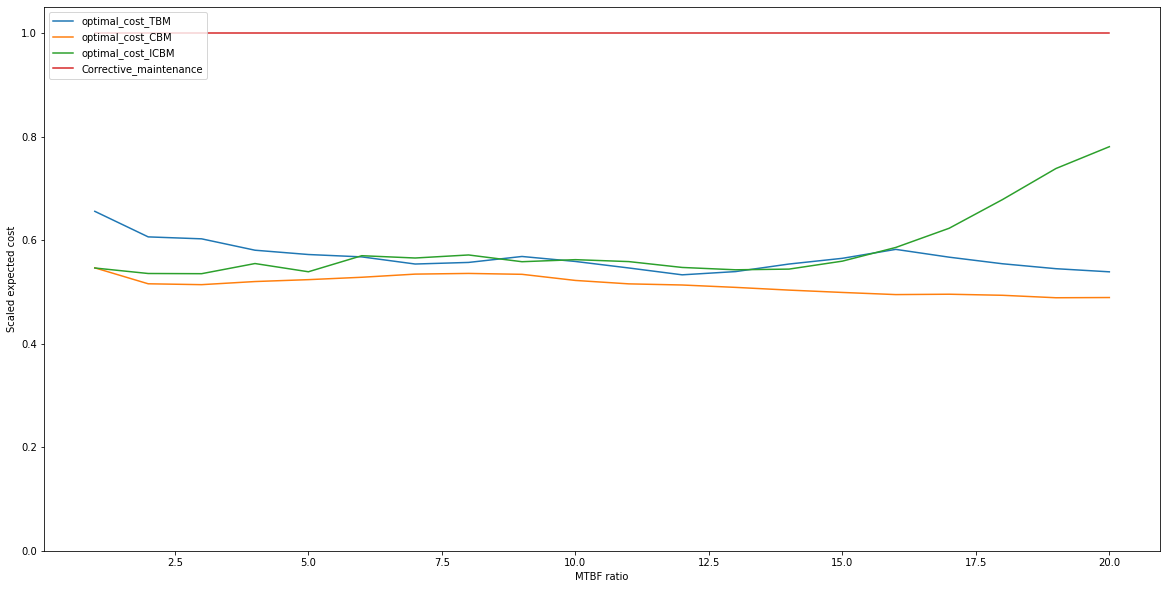

In [25]:
#get results
results = agregate_results('results/','mtbf_ratio')
#plot results
plot_sensitivity_analysis_results(results, 'MTBF ratio', 'Scaled expected cost')
#save the results
results.to_csv(f'curated_results/mtbf_ratio_results.csv')

## Sensitivity case 2 - shocks_ratio

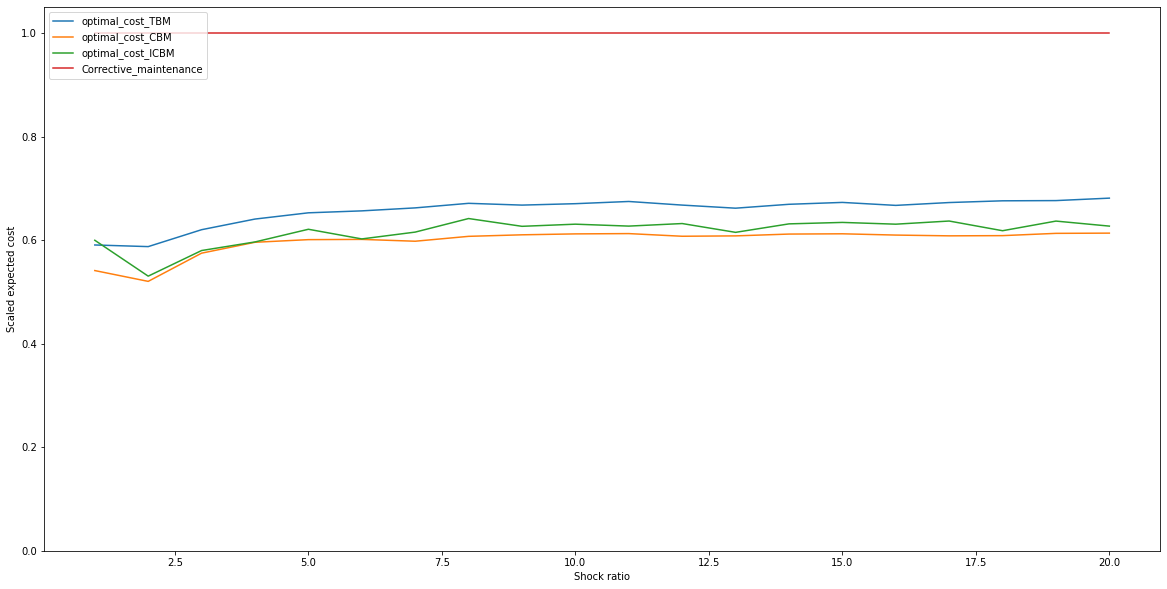

In [26]:
#get results
results = agregate_results('results/','shocks_ratio')
#plot results
plot_sensitivity_analysis_results(results, 'Shock ratio', 'Scaled expected cost')
#save the results
results.to_csv(f'curated_results/shocks_ratio.csv')

## Sensitivity case 3 - shocks_intensity

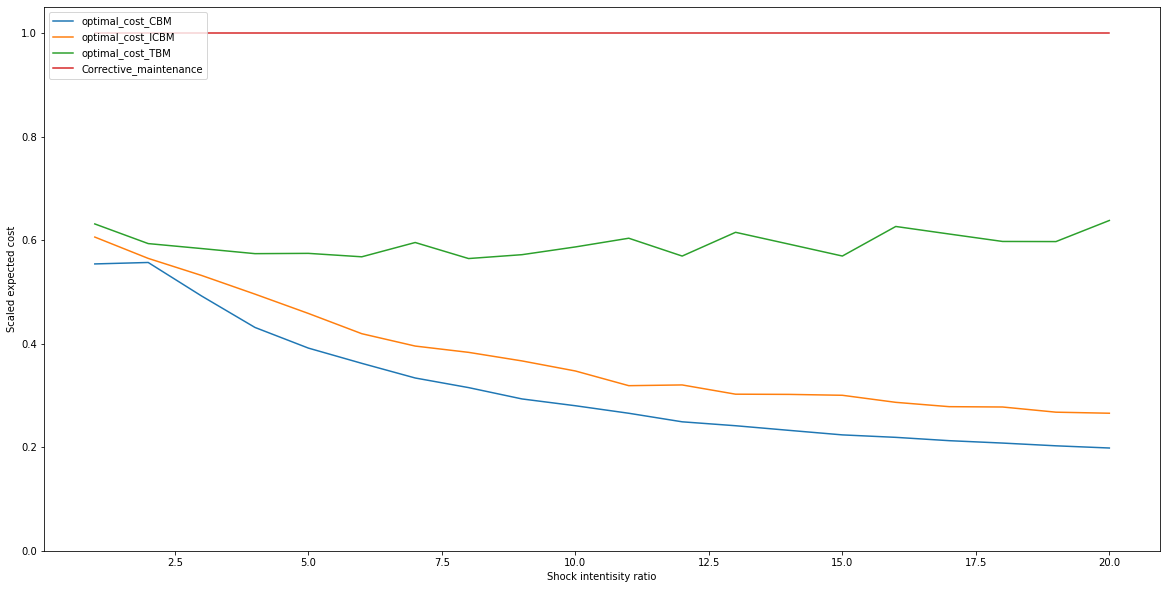

In [27]:
#get results
results = agregate_results('results/','shocks_intensity')
#plot results
plot_sensitivity_analysis_results(results, 'Shock intentisity ratio', 'Scaled expected cost')
#save the results
results.to_csv(f'curated_results/shocks_intensity.csv')

## Sensitivity case 4 - maintenance_costs_ratio

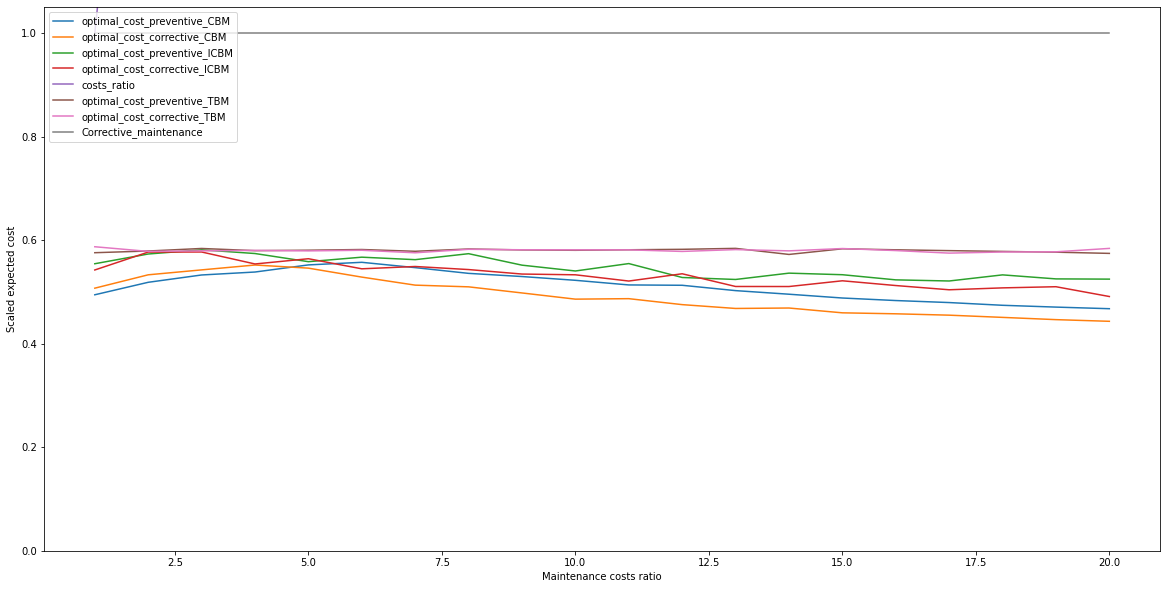

In [28]:
#get results
results = agregate_results('results/','maintenance_costs_ratio')
#plot results
plot_sensitivity_analysis_results(results, 'Maintenance costs ratio', 'Scaled expected cost')
#save the results
results.to_csv(f'curated_results/maintenance_costs_ratio.csv')

## Sensitivity case 5 - monitoring_costs_ratio

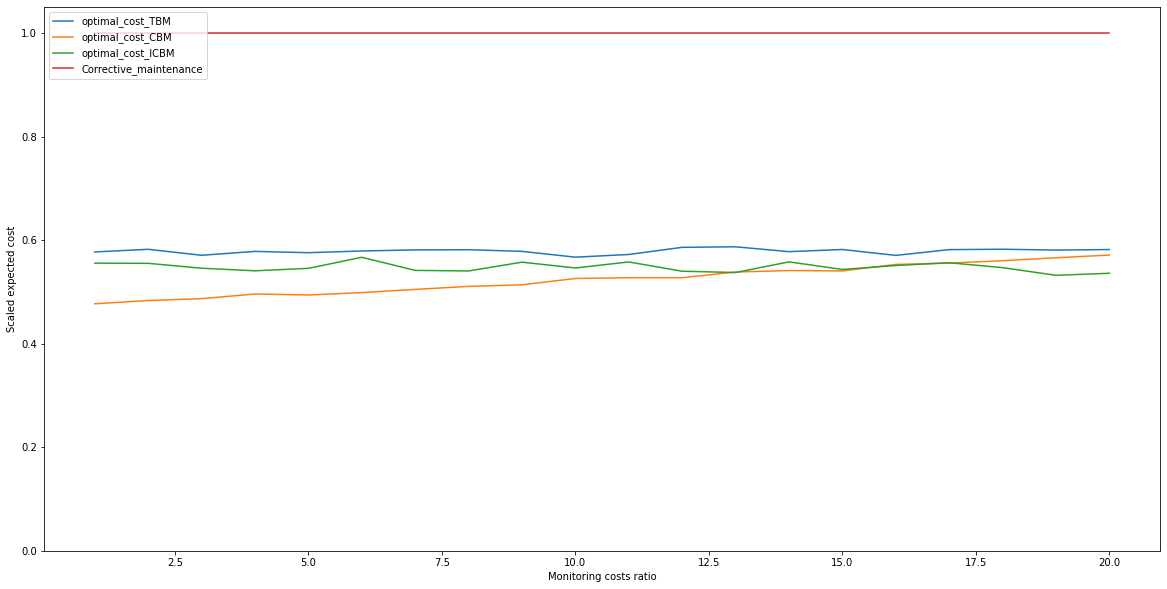

In [31]:
#get results
results = agregate_results('results/','monitoring_costs_ratio')
#plot results
plot_sensitivity_analysis_results(results, 'Monitoring costs ratio', 'Scaled expected cost')
#save the results
results.to_csv(f'curated_results/monitoring_costs_ratio.csv')

## Sensitivity case 6 - monitoring_to_maintenance_costs_ratio

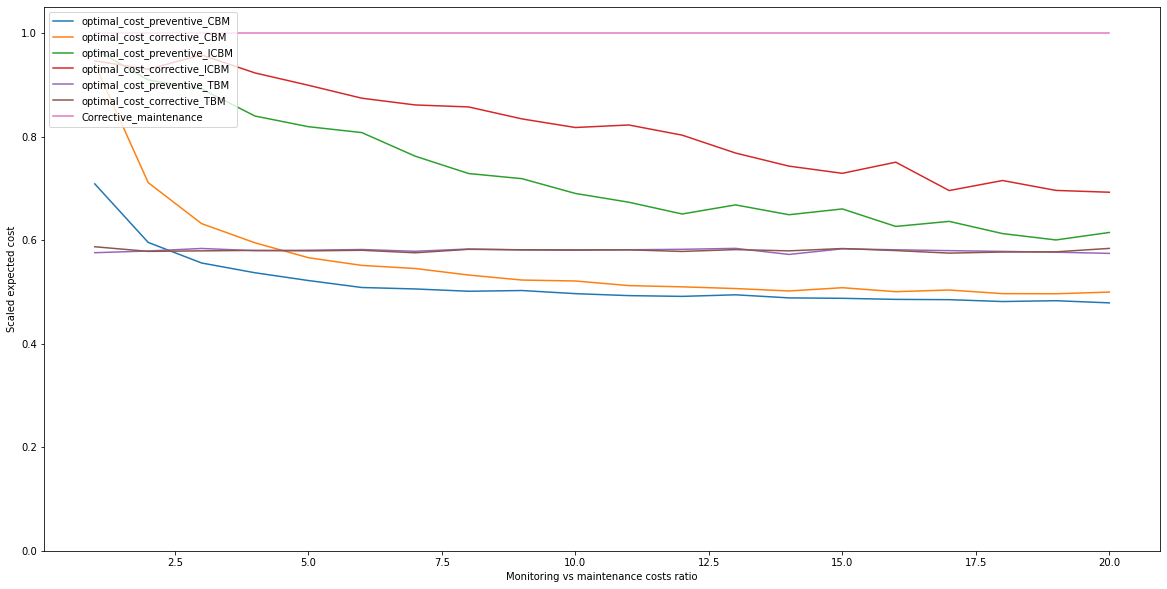

In [32]:
#get results
results = agregate_results('results/','monitoring_to_maintenance_costs_ratio')
#plot results
plot_sensitivity_analysis_results(results, 'Monitoring vs maintenance costs ratio', 'Scaled expected cost')
#save the results
results.to_csv(f'curated_results/monitoring_to_maintenance_costs_ratio.csv')